Transformation Matrix for Rotation:
[[  0.8660254   -0.5         81.14874832]
 [  0.5          0.8660254  -46.85125168]
 [  0.           0.           1.        ]]
Transformation Matrix for Scaling:
[[0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  1. ]]
Transformation Matrix for Translation:
[[  1.   0.  20.]
 [  0.   1. -30.]
 [  0.   0.   1.]]
Transformation Matrix for Shearing:
[[1.  0.5 0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]]


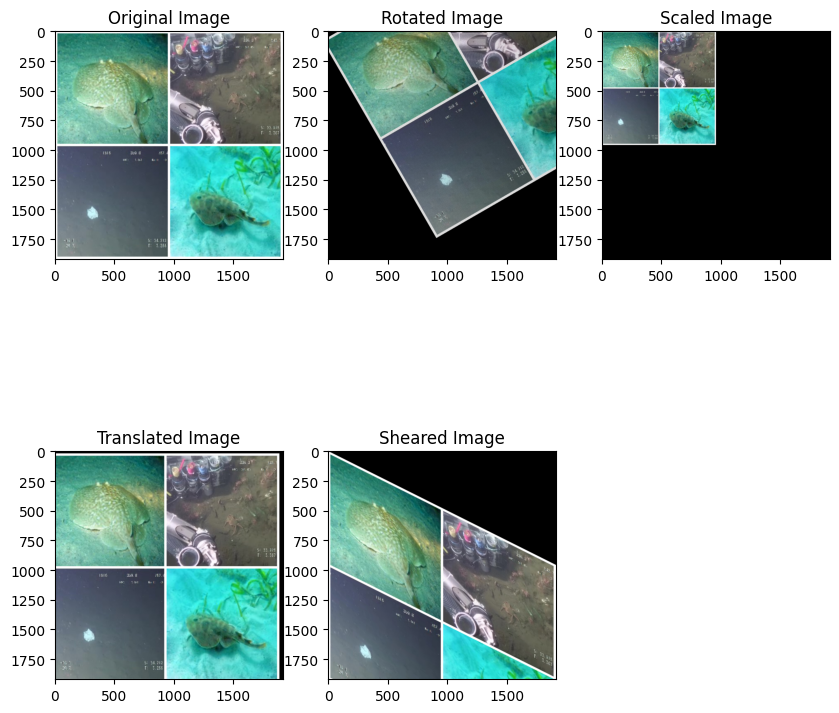

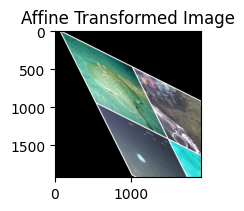

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define the transformation matrix for rotation, scaling, translation, and shearing
def get_transformation_matrix(img_height, img_width, rotation=0, scale_x=1, scale_y=1, reflection=False, translation_x=0, translation_y=0, shear_x=0, shear_y=0):
    rotation_rad = np.deg2rad(rotation)

    x0 = img_width // 2
    y0 = img_height // 2

    sin_rot, cos_rot = np.sin(rotation_rad), np.cos(rotation_rad)

    rotation_matrix = np.array([[cos_rot, -sin_rot, x0 - x0 * cos_rot + y0 * sin_rot],
                                [sin_rot, cos_rot, y0 - x0 * sin_rot - y0 * cos_rot],
                                [0, 0, 1]])

    scale_matrix = np.array([[scale_x, 0, 0],
                             [0, scale_y, 0],
                             [0, 0, 1]])

    translation_matrix = np.array([[1, 0, translation_x],
                                   [0, 1, translation_y],
                                   [0, 0, 1]])

    reflection_matrix = np.array([[-1, 0, 2 * x0],
                                   [0, -1, 2 * y0],
                                   [0, 0, 1]])

    shear_matrix = np.array([[1, shear_x, 0],
                             [shear_y, 1, 0],
                             [0, 0, 1]])

    transformation_matrix = np.eye(3)
    transformation_matrix = np.dot(transformation_matrix, scale_matrix)
    transformation_matrix = np.dot(transformation_matrix, rotation_matrix)
    transformation_matrix = np.dot(transformation_matrix, translation_matrix)
    transformation_matrix = np.dot(transformation_matrix, shear_matrix)
    if reflection:
        transformation_matrix = np.dot(transformation_matrix, reflection_matrix)
    return np.array(transformation_matrix)


# Apply transformation to the image
def apply_transform(img, transformation_matrix):
    transformed = np.zeros_like(img)

    for x0 in range(img.shape[0]):
        for y0 in range(img.shape[1]):
            point = np.array([[x0],
                              [y0],
                              [1]])

            trans_point = np.dot(transformation_matrix, point)

            x1 = int(trans_point[0][0])
            y1 = int(trans_point[1][0])

            if 0 <= x1 < img.shape[0] and 0 <= y1 < img.shape[1]:
                transformed[x1][y1] = img[x0][y0]

    return transformed


# Load the image
img_cv = cv2.imread('sample.jpg')

# Convert BGR to RGB
img_cv_color = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
img = np.array(img_cv)

# Rotation
rotation_matrix = get_transformation_matrix(256, 256, rotation=30)
print("Transformation Matrix for Rotation:")
print(rotation_matrix)
rotated = apply_transform(img, rotation_matrix)
rotated_img = cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)

# Scaling
scaling_matrix = get_transformation_matrix(256, 256, scale_x=0.5, scale_y=0.5)
print("Transformation Matrix for Scaling:")
print(scaling_matrix)
scaled = apply_transform(img, scaling_matrix)
scaled_img = cv2.cvtColor(scaled, cv2.COLOR_BGR2RGB)

# Translation
translation_matrix = get_transformation_matrix(256, 256, translation_x=20, translation_y=-30)
print("Transformation Matrix for Translation:")
print(translation_matrix)
translated = apply_transform(img, translation_matrix)
translated_img = cv2.cvtColor(translated, cv2.COLOR_BGR2RGB)

# Shearing
shearing_matrix = get_transformation_matrix(256, 256, shear_x=0.5)
print("Transformation Matrix for Shearing:")
print(shearing_matrix)
sheared = apply_transform(img, shearing_matrix)
sheared_img = cv2.cvtColor(sheared, cv2.COLOR_BGR2RGB)



# Display images using matplotlib
plt.figure(figsize=(10, 10))

plt.subplot(2, 3, 1)
plt.imshow(img_cv_color)
plt.title("Original Image")

plt.subplot(2, 3, 2)
plt.imshow(rotated_img)
plt.title("Rotated Image")

plt.subplot(2, 3, 3)
plt.imshow(scaled_img)
plt.title("Scaled Image")

plt.subplot(2, 3, 4)
plt.imshow(translated_img)
plt.title("Translated Image")

plt.subplot(2, 3, 5)
plt.imshow(sheared_img)
plt.title("Sheared Image")

plt.show()



# Define the affine transformation matrix
affine_matrix = np.float32([[1, 0.5, 50],   # [1, 0.5, tx]  =>  x' = x + 0.5y + 50
                             [0.5, 1, -20]])  # [0.5, 1, ty] =>  y' = 0.5x + y - 20

# Apply the affine transformation
affine_transformed = cv2.warpAffine(img_cv_color, affine_matrix, (img_cv_color.shape[1], img_cv_color.shape[0]))

# Display the result
plt.subplot(2, 3, 6)
plt.imshow(affine_transformed)
plt.title("Affine Transformed Image")
plt.show()

